In [1]:
from test_script.test1 import train_presention as train_task1
from test_script.test1 import test_presention1 as test_task1
from test_script.test2 import train_presention as train_task3
from test_script.test2 import task2_test as test_task3
from test_script.test3 import train_presention as train_task2
from test_script.newtest3 import task3_presention as test_task2
from test_script.test4 import train_presention as train_task4
from test_script.test4 import test_presention as test_task4


import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

device is NVIDIA A30, set float32_matmul_precision to medium


In [2]:
# train task1
train_task1(epochs=5, batch_size=32, lr=0.01,device='cuda:0')

Model: self.time_weight/self.time_weight.mean()=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.])


Epoch 1/5: 100%|██████████| 63/63 [00:03<00:00, 17.04it/s]


Epoch [1/5], Loss: 7.6226,lr:0.010000


Epoch 2/5: 100%|██████████| 63/63 [00:03<00:00, 18.39it/s]


Epoch [2/5], Loss: 6.0375,lr:0.010000


Epoch 3/5: 100%|██████████| 63/63 [00:03<00:00, 18.43it/s]


Epoch [3/5], Loss: 5.9283,lr:0.010000


Epoch 4/5: 100%|██████████| 63/63 [00:03<00:00, 18.19it/s]


Epoch [4/5], Loss: 5.7631,lr:0.010000


Epoch 5/5: 100%|██████████| 63/63 [00:03<00:00, 18.45it/s]

Epoch [5/5], Loss: 5.5510,lr:0.010000


[85]
Model: self.time_weight/self.time_weight.mean()=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.])
pred_traj [array([5776, 5777, 5788, 5774, 5788, 5789, 5790]), array([1622,  350]), array([6759, 6763]), array([588, 585, 591]), array([7218, 3977, 1854,  880]), array([5462, 5461, 5462, 4766, 5462, 4766, 4760, 4761, 4757, 4761, 4757,
       4761, 4757, 4761]), array([4973, 4963]), array([1256, 1257, 1724, 1968, 4388, 1982, 1983]), array([8048, 1352]), array([3190, 1904, 3190, 3188, 1904]), array([1858, 3064]), array([7636, 5917, 6236, 5715]), array([258, 255, 101]), array([1515, 1254, 1375, 1475, 2292, 8491, 1808, 2292, 1475, 1375, 1254,
       1252, 1249]), array([342, 332, 329]), array([5961, 2862, 2864, 5965, 5960, 2871, 5957, 5955]), array([4323, 4324]), array([

Generating Video: 100%|██████████| 32/32 [00:16<00:00,  1.91it/s, plot_time (s)=0.444, save_time (s)=0.007, total_time (s)=0.451]


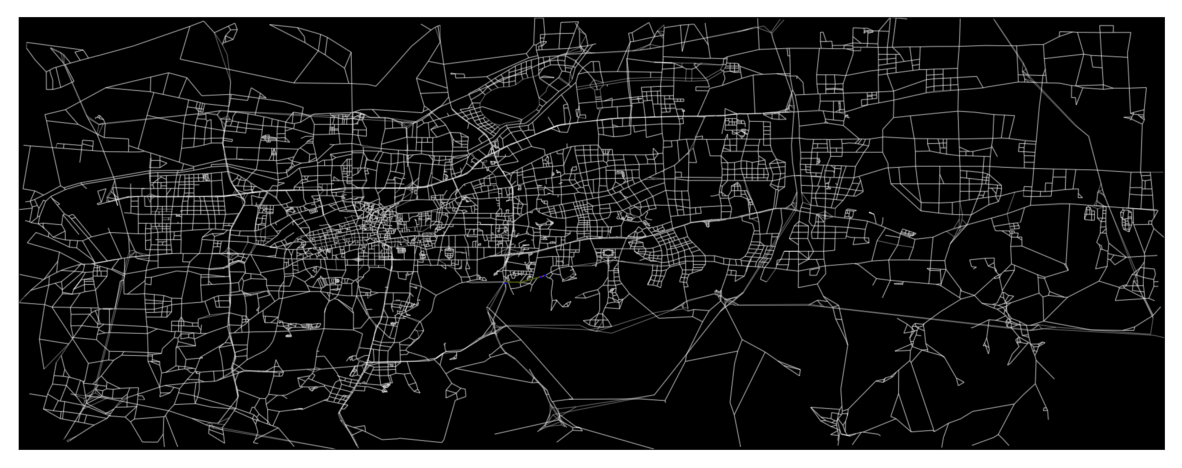

In [3]:
k = np.random.choice(np.arange(0,99), 1)
print(k)
test_task1(k[0])
path1 = 'task1/video/dj/frames/frame_8.png'
img1 = Image.open(path1)
plt.figure(figsize=(15, 20))
plt.imshow(img1)
plt.axis('off')
plt.show()

In [2]:
# task2
train_task2(epochs=3,batch_size=16,device='cuda:0',lr=0.01) #

/datadisk/yanshou/SmartTrafficFramework/dataloader.py:94: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.adj_l = torch.tensor(self.adj_l,dtype=torch.float)
Train epoch      1/3     : 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


Train epoch      1/3     |  Loss: 9.32589626  | LR: 0.00750000  | Load data time: 0.00...m  |  Preprocess data time: 0.04   m  |  Forward time: 0.02   m  |  Backward time: 0.02   m  |  Total time: 0.09   m


Train epoch      2/3     : 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]


Train epoch      2/3     |  Loss: 8.63680172  | LR: 0.00250000  | Load data time: 0.00...m  |  Preprocess data time: 0.04   m  |  Forward time: 0.02   m  |  Backward time: 0.02   m  |  Total time: 0.09   m


Train epoch      3/3     : 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]

Train epoch      3/3     |  Loss: 8.31931686  | LR: 0.00000000  | Load data time: 0.00...m  |  Preprocess data time: 0.04   m  |  Forward time: 0.02   m  |  Backward time: 0.03   m  |  Total time: 0.09   m


In [ ]:
test_task2(ratio = 0.5)

pos: 8908, edges: 23312


Loading trajectories: 1184417it [01:00, 19697.98it/s]
Transfering jinan points into trajectories: 100%|██████████| 160000/160000 [00:04<00:00, 34186.19it/s]
Loading trajectories: 1184417it [00:57, 20563.84it/s]
Transfering jinan points into trajectories: 100%|██████████| 10000/10000 [00:01<00:00, 5464.83it/s]


load_id: best_model


1000it [04:24,  3.78it/s]


finish forward, start calculate load


In [2]:
# task3
train_task3(epochs=4,batch_size=32,lr=0.01) #从0开始训练，为方便展示只用了少量数据

Window size: 1


Epoch 1/4: 100%|██████████| 32/32 [00:02<00:00, 11.99it/s]


epoch 1, Loss: 8.318332731723785, LR: 0.01


Epoch 2/4: 100%|██████████| 32/32 [00:02<00:00, 14.31it/s]


epoch 2, Loss: 7.915563613176346, LR: 0.01


Epoch 3/4: 100%|██████████| 32/32 [00:02<00:00, 13.27it/s]


epoch 3, Loss: 7.05436746776104, LR: 0.01


Epoch 4/4: 100%|██████████| 32/32 [00:02<00:00, 12.73it/s]

epoch 4, Loss: 5.5670998096466064, LR: 0.01


In [3]:
k = np.random.choice(np.arange(0,100),1) #100为测试集大小
print(k)
im = test_task3(k)
im.show()
#红色轨迹为模型预测最短路径，蓝色轨迹为Djs算法生成的最短路径

[23]
Window size: 1


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# task4 
train_task4(epochs=1)

Epoch 0

Step: 0       |  Loss: 0.11510579  | Random act prob: 0.99500000  |  LR 0.0005  |  Data Time: 0.00   m  |  Preprocess Time: 0.00   m  |  Act Time: 0.28   m  |  Replay Time: 0.50   m  |  Total Time: 0.78   m  | Flow Rate:0.00000000
Step: 1       |  Loss: 0.00104811  | Random act prob: 0.99002500  |  LR 0.0005  |  Data Time: 0.00   m  |  Preprocess Time: 0.00   m  |  Act Time: 0.27   m  |  Replay Time: 0.50   m  |  Total Time: 0.77   m  | Flow Rate:0.66666667
Step: 2       |  Loss: 0.00084200  | Random act prob: 0.98507488  |  LR 0.0005  |  Data Time: 0.00   m  |  Preprocess Time: 0.00   m  |  Act Time: 0.28   m  |  Replay Time: 0.50   m  |  Total Time: 0.77   m  | Flow Rate:0.00000000
Step: 3       |  Loss: 0.00071068  | Random act prob: 0.98014950  |  LR 0.0005  |  Data Time: 0.00   m  |  Preprocess Time: 0.00   m  |  Act Time: 0.27   m  |  Replay Time: 0.50   m  |  Total Time: 0.78   m  | Flow Rate:0.50000000
Step: 4       |  Loss: 0.00078543  | Random act prob: 0.97524875  |

/home/yanshou/miniconda3/envs/traffic/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yanshou/miniconda3/envs/traffic/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Step: 24      |  Loss: 0.00049794  | Random act prob: 0.88222024  |  LR 0.0005  |  Data Time: 0.00   m  |  Preprocess Time: 0.00   m  |  Act Time: 0.28   m  |  Replay Time: 0.50   m  |  Total Time: 0.78   m  | Flow Rate:nan       
Step: 25      |  Loss: 0.00010767  | Random act prob: 0.87780914  |  LR 0.0005  |  Data Time: 0.00   m  |  Preprocess Time: 0.00   m  |  Act Time: 0.28   m  |  Replay Time: 0.50   m  |  Total Time: 0.78   m  | Flow Rate:0.75000000
Step: 26      |  Loss: 0.00005814  | Random act prob: 0.87342010  |  LR 0.0005  |  Data Time: 0.00   m  |  Preprocess Time: 0.00   m  |  Act Time: 0.28   m  |  Replay Time: 0.50   m  |  Total Time: 0.78   m  | Flow Rate:0.40000000
Step: 27      |  Loss: 0.00002531  | Random act prob: 0.86905300  |  LR 0.0005  |  Data Time: 0.00   m  |  Preprocess Time: 0.00   m  |  Act Time: 0.27   m  |  Replay Time: 0.50   m  |  Total Time: 0.78   m  | Flow Rate:0.20000000
Step: 28      |  Loss: 0.00004117  | Random act prob: 0.86470773  |  LR 0.00

In [21]:
test_task4(method=1)

tensor([4, 4, 4, 4, 4], device='cuda:2', dtype=torch.int32)
tensor([[-1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, 15,  8,  1],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0,